<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/Binary_%26_Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification

- 64 $ \times $ 64 픽셀의 고양이 사진을 분류한다고 예를 들어보면
  - 1은 고양이로, 0은 고양이가 아닌걸로 나누어 볼 수 있다.
  - 여기서, 고양이를 구분할 때 RGB값을 각각 픽셀 값을 순서대로 배열하면 $ 64 \times 64 \times 3$(RGB)인 3차원 배열을 학습시킨다.
- 로지스틱 회귀란 이진 분류를 하기 위해 사용되는 알고리즘입니다.

# Logistic Regression

- 로지스틱 회귀란 답이 0 또는 1로 정해져있는 이진 분류 문제에 사용되는 알고리즘입니다.
- X (입력 특성), y (주어진 입력특성 X에 해당하는 실제 값),
​​   $ \hat{y} $(y의 예측값) 을 의미합니다.
- 더 자세히 이진 분류를 위한 ​$ \hat{y} $​​ 값은 y가 1일 확률을 의미하며 $ 0 \le \hat{y} \le 1 $사이의 값을 가져야 합니다.
- 선형 회귀시 $ \hat{y} = W^T X + b $ 를 통해 계산하지만, 해당 값은 0과 1 범위를 벗어날 수 있습니다. 따라서 시그모이드 함수를 통해 0과 1사이의 값으로 변환해줍니다.
  - 신경망을 구현할 때는 파라미터를 W, b로 분리합니다. 
    여기서 b는 인터셉트 항을 뜻합니다. 
- 따라서 로지스틱 회귀를 위한 ​$ \hat{y} = W^T X + b $ 로 구하게 됩니다.
  참고) sigmoid 함수 $\sigma(z) = \frac{1}{1 + exp^{-z}}$

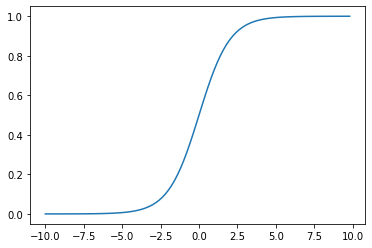

In [ ]:
# plot sigmoid
# if x large -> 1
# if x large negative number -> 0

import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.show()

# Logistic Regression cost function

- 우리의 목표는 실제값(y)에 가까운 예측값( $ \hat{y} $​​ )를 구하는 것입니다.
- 손실 함수(cost function)는 하나의 입력특성(x)에 대한 실제값(y)과 예측값( 
​$ \hat{y} $ ) 의 오차를 계산하는 함수입니다.
- 로지스틱 회귀에서 사용하는 손실 함수는 다음과 같습니다.
  $$ L(\hat{y}, y) = - (y log \hat{y} + (1-y)log(1-\hat{y})) $$
- 이 함수를 직관적으로 이해하기 위해 두 가지 경우로 나누어 생각해 볼 수 있습니다.
  1. y = 0인 경우 $ L(\hat{y},y) = -log(1-\hat{y})) $ 가 0에 가까워지도록 $ \hat{y} $는 0에 수렴하게 됩니다.
  2. y = 1인 경우 $ L(\hat{y}, y) = -log \hat{y} $ 가 0에 가까워지도록 $ \hat{y} $는 1에 수렴하게 됩니다.
- 하나의 입력에 대한 오차를 계산하는 함수를 손실 함수라고 하며, 모든 입력에 대한 오차를 계산하는 함수는 비용 함수라고 합니다.
- 따라서 비용 함수는 모든 입력에 대해 계산한 손실 함수의 평균 값으로 구할 수 있으며 식으로 나타내면 다음과 같습니다.
  $$ J(w,b) = -\frac{1}{m} \sum^{i=m}_{i=1}(y^{(i)}+ (1-y^{(i)})log(1-\hat{y}^{(i)}) $$
- 항상 기억해야 할 것은, 우리는 실제값과 비슷한 예측값을 원합니다. 즉, 비용 함수의 값이 작아지도록 하는 w와 b를 찾는게 우리의 목표입니다.

# 경사하강법 (Gradient Descent)

- 이전 시간의 비용함수가 전체 데이터셋의 예측이 얼마나 잘 평가되었는지 보는 것이라면, 경사하강법은 이를 가능케하는 파라미터 w와 b를 찾아내는 방법 중 하나 입니다.

- 우선, 비용 함수는 볼록한 형태여야 합니다. 볼록하지 않은 함수를 쓰게 되면, 경사하강법을 통해 최적의 파라미터를 찾을 수 없습니다.

- 함수의 최소값을 모르기 때문에, 임의의 점을 골라서 시작합니다.

- 경사하강법은 가장 가파른(steepest) 방향, 즉 함수의 기울기를 따라서 최적의 값으로 한 스텝씩 업데이트하게 됩니다.

- 알고리즘은 아래와 같습니다.
​​  
  - w: $ w - \alpha \frac{\partial J(w,b)}{\partial w}$
  - b: $ b - \alpha \frac{\partial J(w,b)}{\partial b} $
  - $ \alpha $ : 학습률이라고 하며, 얼만큼의 스텝으로 나아갈 것인지 정합니다.  
  - $ \frac{\partial J(w,b)}{\partial w} $ : 도함수라고 하며, 미분을 통해 구한 값 입니다. dw 라고 표기하기도 합니다.

  - 만약 dw > 0 이면, 파라미터 w 는 기존의 w 값 보다 작은 방향으로 업데이트 될 것이고, 만약 dw < 0 이면, 파라미터 w 는 기본의 w 값 보다 큰 방향으로 업데이트 될 것입니다.